In [1]:
import os
import glob
import mne
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier

In [2]:
df_mean_markers = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/EEG/mean_markers.tsv",sep = "\t")

In [3]:
markers = ['PowerSpectralDensity-delta', 'PowerSpectralDensity-deltan',
       'PowerSpectralDensity-theta', 'PowerSpectralDensity-thetan',
       'PowerSpectralDensity-alpha', 'PowerSpectralDensity-alphan',
       'PowerSpectralDensity-beta', 'PowerSpectralDensity-betan',
       'PowerSpectralDensity-gamma', 'PowerSpectralDensity-gamman',
       'PowerSpectralDensity-summary_se',
       'PowerSpectralDensitySummary-summary_msf',
       'PowerSpectralDensitySummary-summary_sef90',
       'PowerSpectralDensitySummary-summary_sef95',
       'PermutationEntropy-default', 'SymbolicMutualInformation-weighted',
       'KolmogorovComplexity-default']

conds = ['anest', 'cm3v', 'cm5v', 'vl3v', 'vl5v']

In [4]:
dict_cond = {'anest' : 0, 
             'cm3v' : 1,
             'cm5v' : 2,
             'vl3v' : 3,
             'vl5v' : 4}

In [5]:
X = df_mean_markers[markers].to_numpy()
y_cond = df_mean_markers[["cond"]].to_numpy().reshape((-1))
y = np.array([dict_cond[cond] for cond in y_cond])

[0.71428571 0.55555556 0.8        0.75       0.75      ]


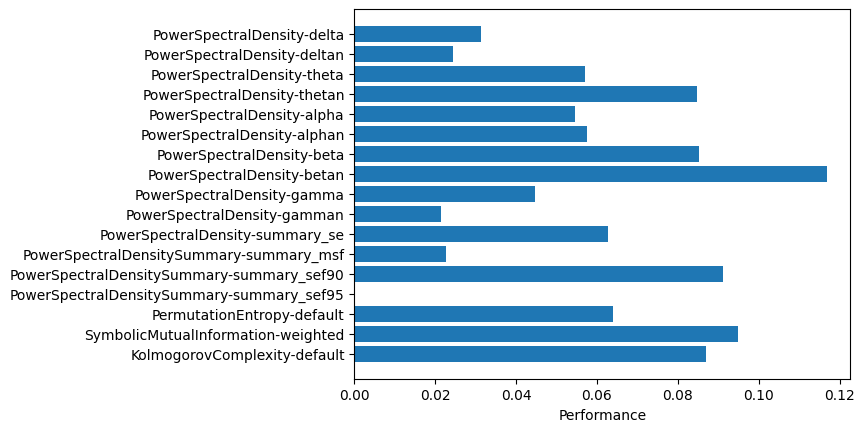

In [44]:
prob_list = np.zeros(5)
features_importance = np.zeros(len(markers))
n = 3000

for seed in np.random.randint(0,10000,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    extra_tree = ExtraTreeClassifier(random_state=0)
    extra_tree.fit(X_train,y_train)
    pred = extra_tree.predict(X_test)
    for i in range(5):
        prob_list[i] += np.sum(pred[y_test == i] == i)/np.sum(y_test == i)
    features_importance += extra_tree.feature_importances_
print(prob_list/n)

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(markers))
ax.barh(y_pos, extra_tree.feature_importances_, align='center')
ax.set_yticks(y_pos, labels=markers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')

plt.show()

In [28]:
extra_tree.score(X_test,y_test)

0.7027027027027027

In [29]:
pred = extra_tree.predict(X_test)

In [23]:
np.sum(y_test == 2)

4

In [24]:
pred[y_test == 2]

array([1, 2, 4, 2])

In [30]:
for i in range(5):
    print("{} : {}".format(i,np.sum(pred[y_test == i] == i)/np.sum(y_test == i)))

0 : 0.45454545454545453
1 : 0.8
2 : 0.8571428571428571
3 : 1.0
4 : 0.625


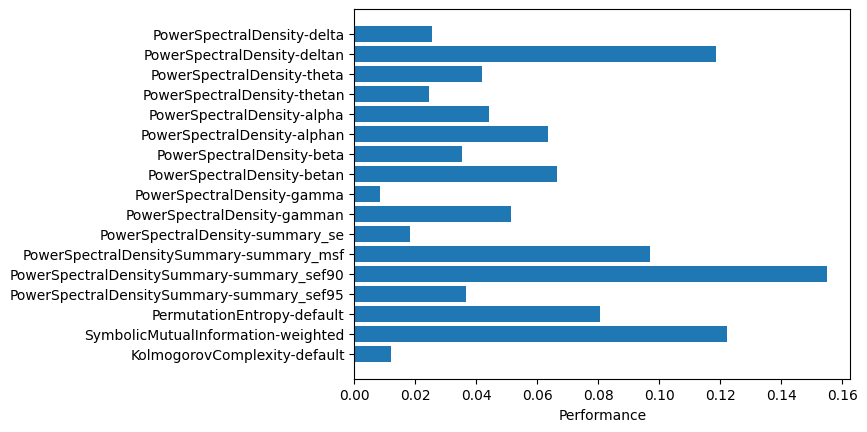

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(markers))
ax.barh(y_pos, extra_tree.feature_importances_, align='center')
ax.set_yticks(y_pos, labels=markers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')

plt.show()